# Part II - (Factors affect a loan’s outcome status?)

## by (ACHUMBOM HAGGAI AKUMBOM)

## Investigation Overview

We will Look at the factor that Affects the Loan Status and also investigate on how this factor aftect one anothewe will be using the prosperLoan data set


## Dataset Overview
The ProsperLoan data set [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) Contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate),current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan=pd.read_csv("../Udacity_Data_Anayltic_Project_3-Visualization/prosperLoanData.csv")
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loans_clean =loan.copy()

In [4]:
loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
loans_clean.drop_duplicates(inplace=True)

In [6]:
# Columns needed for my visualizations
columns = ['LoanKey', 'Term', 'LoanStatus','BorrowerAPR', 'BorrowerRate', 'ListingCategory (numeric)', 
           'BorrowerState', 'Occupation', 'EmploymentStatus', 'LoanOriginalAmount', 'CreditScoreRangeLower',
           'CreditScoreRangeUpper', 'DebtToIncomeRatio', 'Investors', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 
           'IncomeVerifiable', 'ProsperScore','ProsperRating (Alpha)']

loans_clean = loans_clean[columns]
loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanKey                    113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   Occupation                 110349 non-null  object 
 8   EmploymentStatus           111682 non-null  object 
 9   LoanOriginalAmount         113937 non-null  int64  
 10  CreditScoreRangeLower      113346 non-null  float64
 11  CreditScoreRangeUpper      113346 non-null  float64
 12  DebtToIncomeRatio          105383 non-null  float64
 13  Investors                  11

In [7]:
loans_clean.shape

(113937, 19)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distribution of Loan Status across the dataset)
About 106,642 of the borrower are either  on a Loan `Current` , `Completed`,`Chargedoff`or have a `Defaulted`                **Loan Status**

In [8]:
#In Order to  Stop repeated codes we can automate some parts of our codes such as the title and lables going forward
def plot_title(title,x_label,y_label,xticks):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=90)

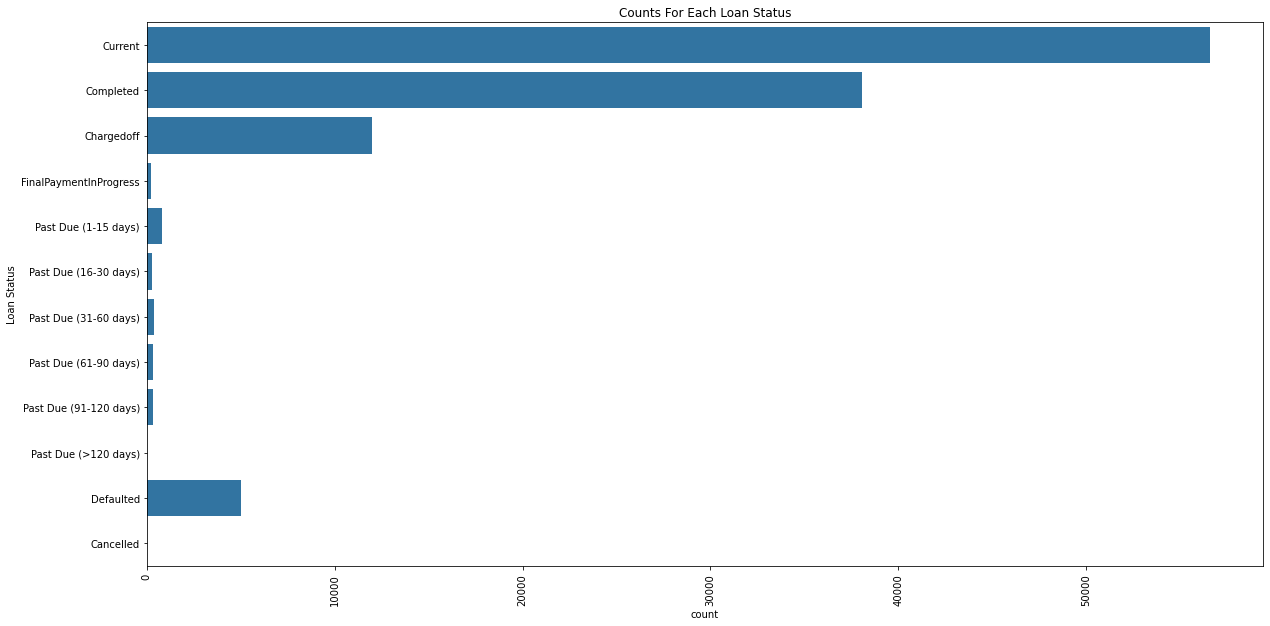

In [9]:
# Set default color from color palette
base_color = sns.color_palette()[0]
# Using Countplot for distribution
plt.figure(figsize = [20, 10])
data_order = ['Current','Completed','Chargedoff','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Cancelled']
sns.countplot(data = loans_clean, y = 'LoanStatus', color = base_color, order = data_order)
plot_title('Counts For Each Loan Status','count','Loan Status','')
plt.show()

##  What is the Relationship between Numeric and Categorical Variables?

In [10]:
numeric_vars = ['LoanOriginalAmount', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'MonthlyLoanPayment']
categoric_vars = ['ProsperRating (Alpha)', 'LoanStatus']
ordr = ['Current','Completed','Chargedoff','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)'
        ,'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Cancelled']

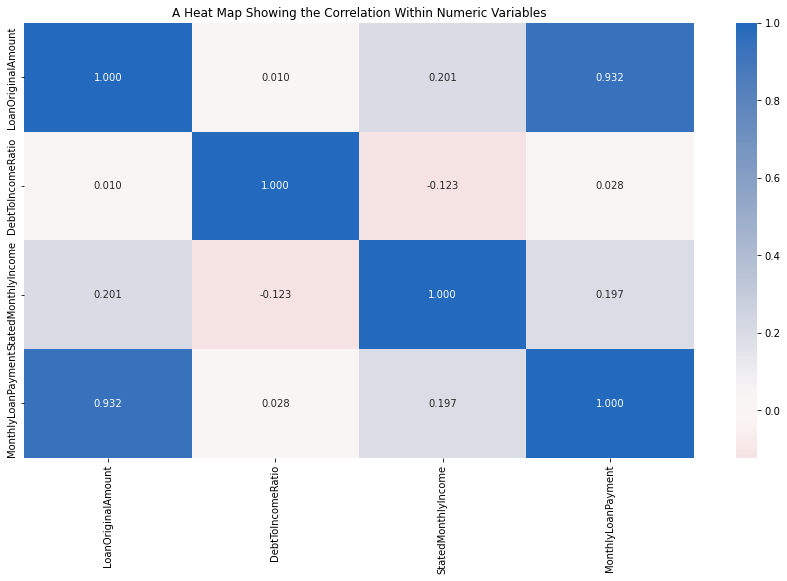

In [12]:
# correlation plot
plt.figure(figsize = [15, 8])
sns.heatmap(loans_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plot_title('A Heat Map Showing the Correlation Within Numeric Variables','','','')
plt.show()

We Noticed There's a Positive coralation between LoanOriginalAmount and MonthlyLoanPayment

##  What is the Relationship between LoanOriginalAmount and MonthlyLoanPayment?

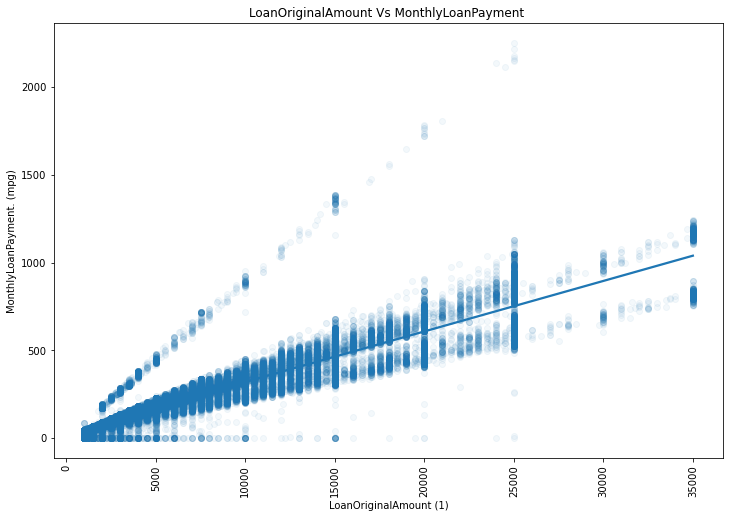

In [13]:
# Scatter plot
plt.figure(figsize = [12, 8])
sns.regplot(data = loans_clean, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', scatter_kws={'alpha':1/20});
plot_title('LoanOriginalAmount Vs MonthlyLoanPayment ','LoanOriginalAmount (1)','MonthlyLoanPayment. (mpg)','')
plt.show()

This Plot suggest a Possitive correlation between Loan Original Amount and Monthly Loan Payment emplying that those with high loan amount payed high sums of money monthly

## Plot  of Loan Status aganist Borrower Rate

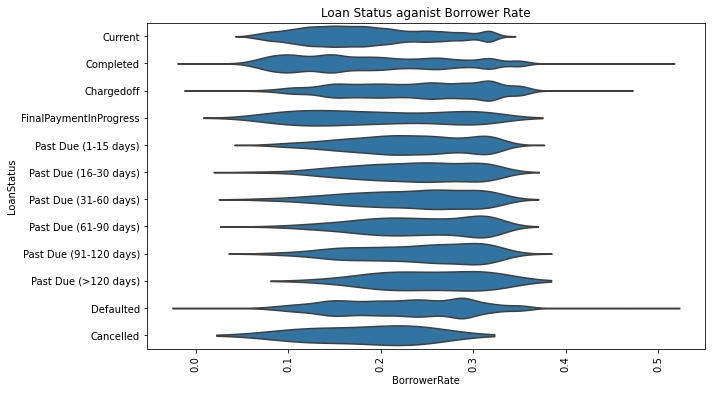

In [14]:
#Let's Plot Loan Status aganist Borrower Rate
plt.figure(figsize = [10, 6])
base_color = sns.color_palette()[0] 
data_order = ['Current','Completed','Chargedoff','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Cancelled']
sns.violinplot(data=loans_clean, y='LoanStatus', x='BorrowerRate', color=base_color,order = data_order, inner=None)
plot_title('Loan Status aganist Borrower Rate','BorrowerRate','LoanStatus','')
plt.show();

We noticed that Borrowers with Past due and Defaulted and Current Loans Status have High Borrower Rates than those with Completed current Loan Status. Therfore the **Borrower Rate is a factor that will affect Loan Status**

## Plotting  IncomeVerifiable against LoanStatus with help of a heat map

In [15]:
# In the first step I need to reshape the data to
ct_counts = loans_clean.groupby(['LoanStatus', 'IncomeVerifiable']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IncomeVerifiable', values = 'count')
ct_counts

IncomeVerifiable,False,True
LoanStatus,,
Cancelled,1,4
Chargedoff,1260,10732
Completed,2782,35292
Current,4142,52434
Defaulted,258,4760
FinalPaymentInProgress,16,189
Past Due (1-15 days),84,722
Past Due (16-30 days),23,242
Past Due (31-60 days),36,327


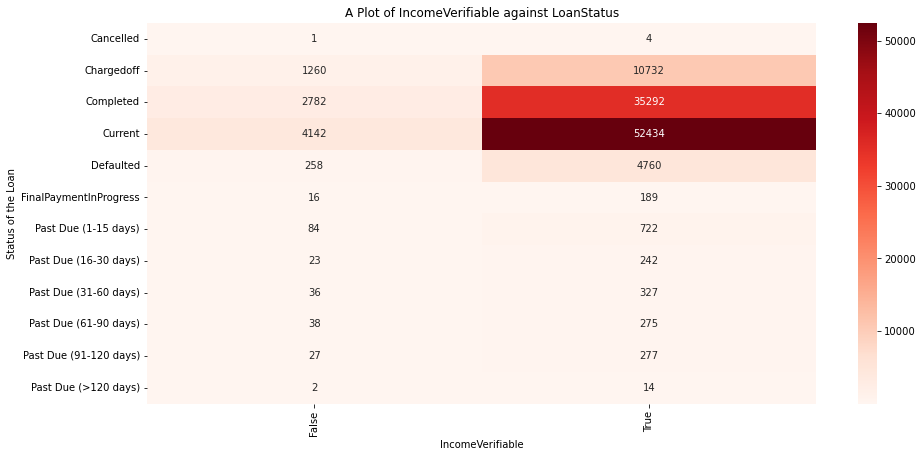

In [16]:
plt.figure(figsize = [15,7])
mask = ct_counts.isnull()
sns.heatmap(ct_counts, annot = True, fmt = '.0f', cmap = 'Reds',mask = mask)
plot_title('A Plot of IncomeVerifiable against LoanStatus','IncomeVerifiable','Status of the Loan','')
plt.show();

We noticed that alot of  Lenders with Verifiable Income sourced ended up either Charging off , 
Completing are Currently on a Loan this tells us that the Income Verifiable Affects the Loan  Status

## BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper

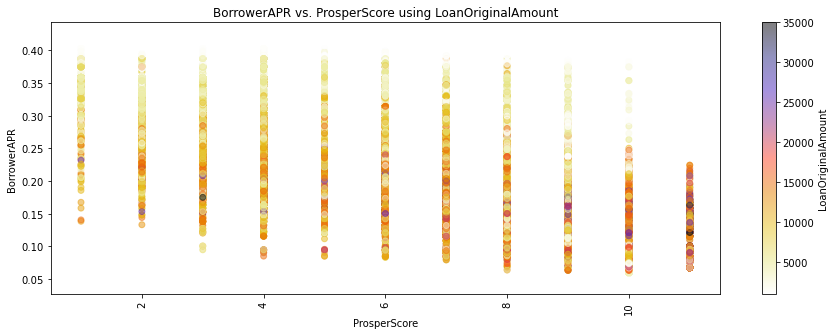

In [17]:
# BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper
plt.figure(figsize = [15, 5]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data=loans_clean[loans_clean['StatedMonthlyIncome']<20000],x='ProsperScore',
            y='BorrowerAPR',c='LoanOriginalAmount',cmap=cm ,alpha=1/2 ) 
plt.colorbar(label = 'LoanOriginalAmount')
plot_title('BorrowerAPR vs. ProsperScore using LoanOriginalAmount','ProsperScore','BorrowerAPR','')
plt.show();

We noticed that loans with higher amounts (>$15,000) are mostly taken by people with higher prosper score (6 and above)

## BorrowerAPR against StatedMonthlyIncome on a FacetGrid hue with Loan Status 

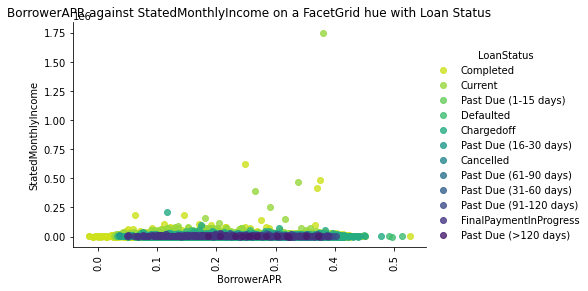

In [18]:
## BorrowerAPR against StatedMonthlyIncome on a FacetGrid hue with Loan Status 
g = sns.FacetGrid(data = loans_clean, hue = 'LoanStatus',
                 size = 4,aspect = 1.5, palette = 'viridis_r')
g = g.map(sns.regplot, 'BorrowerAPR', 'StatedMonthlyIncome', x_jitter= 0.04, fit_reg = False);
g.add_legend()
plot_title('BorrowerAPR against StatedMonthlyIncome on a FacetGrid hue with Loan Status','BorrowerAPR','StatedMonthlyIncome','')
plt.show();

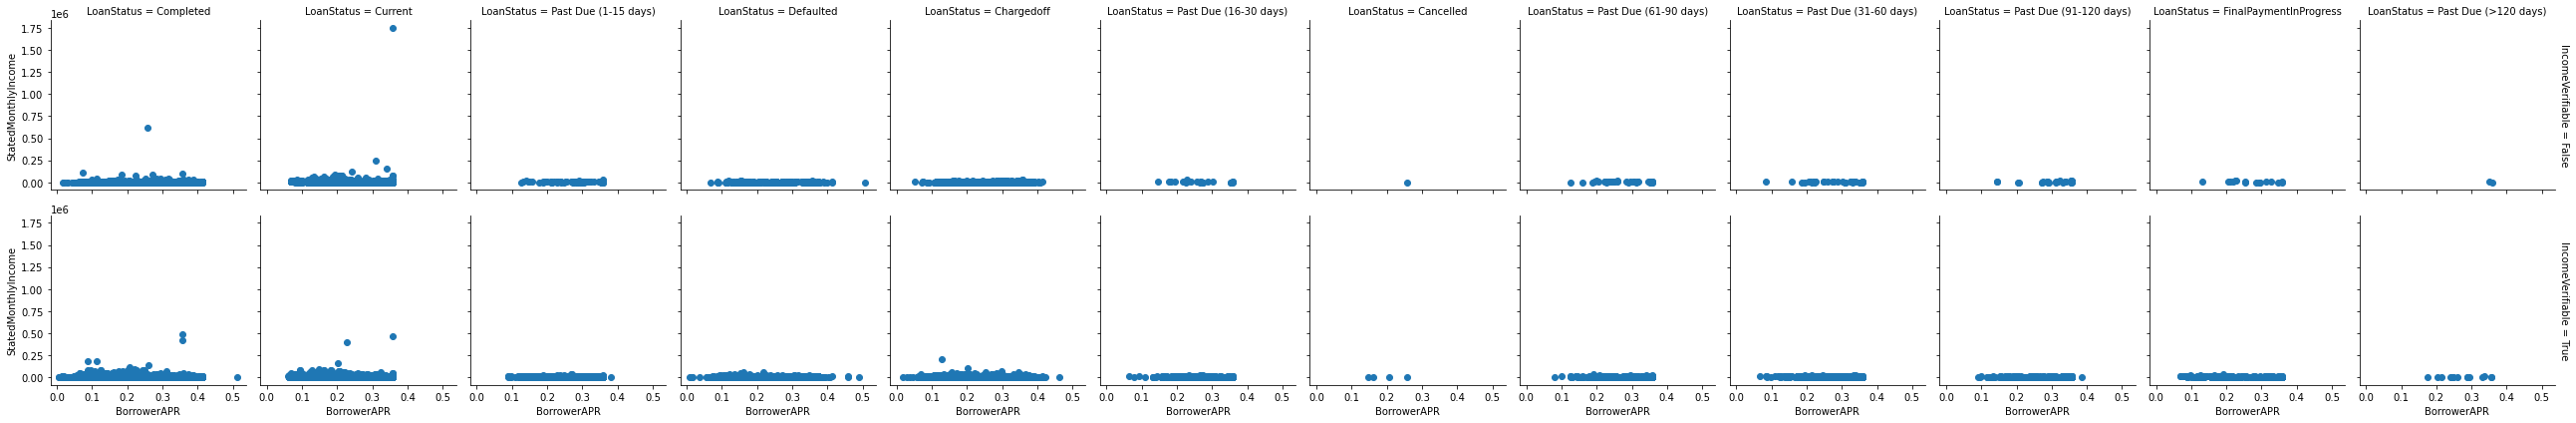

In [19]:
g = sns.FacetGrid(data = loans_clean, col = 'LoanStatus', row = 'IncomeVerifiable',
                margin_titles = True)
g.map(plt.scatter, 'BorrowerAPR', 'StatedMonthlyIncome');

We noticed that on a FacetGrid with only one column we notice that Past due and defaulted loansStatuts Higher had BorrowerAPR

### Thanks for Your Attention
A Presentation by`ACHUMBOM HAGGAI AKUMBOM`  

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [20]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_ProsperLoanData_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_ProsperLoanData_slide_deck.ipynb to slides
[NbConvertApp] Writing 1008780 bytes to Part_II_ProsperLoanData_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_not

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
